# AFS Analytics Computer Vision and Python Training

## CNNs
In this exercises we will work through several convolutional neural networks using Keras



In [ ]:
#run this only from colaboratory
from google.colab import drive
drive.mount('/content/gdrive')
#files are at: /content/gdrive/My Drive/...

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Deep Learning
Unless you haven't done this on day 1, you will have to install TF and Keras if you are using your local machine. Colab already has them installed so you can skip.
For this part of the training we will use Keras and Tensorflow.
If you haven't yet install Tensorflow and Keras. 
1. Installing tensorflow: ```pip install tensorflow-gpu``` If you have a GPU available in your environment
> ```pip install tensorflow``` for CPU only mode
2. Installing keras: ```pip install keras```

### Image Classification
We will use CIFAR10 dataset. We start by importing all the required packages

##Exercise 1. Intro to CNNs
But first let's check if keras sees our GPU (for those of you with one)<br>
```from keras import backend as K
K.tensorflow_backend._get_available_gpus()```

In [ ]:
import keras
import tensorflow as tf

from keras.datasets import cifar10
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


Data preparation: collection, train/test split, preprocessing (0-1 normalization)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10
# input image dimensions
rows,cols,ch = 32, 32, 3
# load the cifar10 data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the cifar10 is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], rows, cols, ch)
x_test = x_test.reshape(x_test.shape[0], rows, cols, ch)


# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
input_shape = (rows, cols, ch)
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
             activation='relu',
             input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Train the model. We will use CE loss and a learning rate of 0.01

In [ ]:
#defining the loss
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.SGD(lr=0.01),
          metrics=['accuracy'])
#define callbacks during training
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('accuracy'))

history = AccuracyHistory()
#begin training
model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      validation_data=(x_test, y_test),
      callbacks=[history])


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 129us/step - loss: 0.7186 - accuracy: 0.7538 - val_loss: 1.0883 - val_accuracy: 0.6275
Epoch 2/10
50000/50000 [==============================] - 6s 121us/step - loss: 0.7010 - accuracy: 0.7601 - val_loss: 1.0286 - val_accuracy: 0.6557
Epoch 3/10
50000/50000 [==============================] - 6s 122us/step - loss: 0.6861 - accuracy: 0.7650 - val_loss: 1.0921 - val_accuracy: 0.6355
Epoch 4/10
50000/50000 [==============================] - 6s 123us/step - loss: 0.6598 - accuracy: 0.7759 - val_loss: 1.0302 - val_accuracy: 0.6580
Epoch 5/10
50000/50000 [==============================] - 6s 120us/step - loss: 0.6420 - accuracy: 0.7838 - val_loss: 1.0188 - val_accuracy: 0.6615
Epoch 6/10
50000/50000 [==============================] - 6s 118us/step - loss: 0.6295 - accuracy: 0.7852 - val_loss: 1.0272 - val_accuracy: 0.6631
Epoch 7/10
50000/50000 [==============================] - 6s 1

Evaluation of the model by measuring accuracy. How well it did at the end of each epoch, and how well we can do with never before seen data

Test loss: 1.177935918712616
Test accuracy: 0.6322000026702881
[0.75382, 0.76008, 0.76496, 0.77586, 0.7838, 0.78522, 0.79, 0.79956, 0.80606, 0.81058]


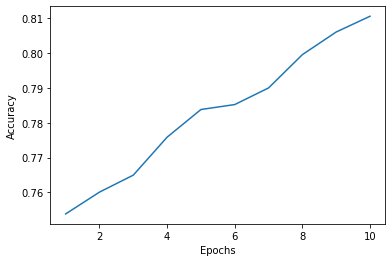

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.acc)
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Modify the model, and other hyperparameters to improve the current performance

## Exercise 2: Transfer Learning.
We will learn how to leverage already pre-trained models as feature extractors and plug in only the classification layers.
We will work through a cats vs. dogs problem

###Data prep

In [1]:
%%capture
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip kagglecatsanddogs_3367a.zip
!mv PetImages train
!find train/Cat -size  0 -print0 |xargs -0 rm --
!find train/Dog -size  0 -print0 |xargs -0 rm --
!ls train/

split train/test

In [3]:
from glob import glob
from sklearn.model_selection import train_test_split

cats = glob('train/Cat/*.jpg')
dogs = glob('train/Dog/*.jpg')

cats_train, cats_test = train_test_split(cats, test_size=0.30)
dogs_train, dogs_test = train_test_split(dogs, test_size=0.30)

TRAIN_DIR = 'train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/Cat
files = ' '.join(cats_test)
!mv -t test/Cat $files

!mkdir test/Dog
files = ' '.join(dogs_test)
!mv -t test/Dog $files


!ls
!pwd
!unzip kagglecatsanddogs_3367a.zip

SyntaxError: ignored

Plot images 

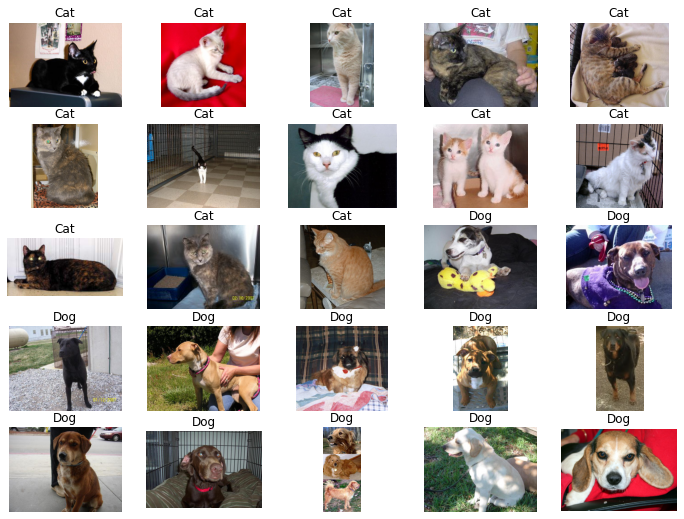

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

cats = np.random.choice(cats_train, 13)
dogs = np.random.choice(dogs_train, 12)
data = np.concatenate((cats, dogs))
labels = 13 * ['Cat'] + 12 *['Dog']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')
    

In [7]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input

CLASSES = 2
    
# setup model
#base_model = InceptionV3(weights='imagenet', include_top=False)
#base_model = VGG16(weights='imagenet', include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

94773248/94765736 [==============================] - 1s 0us/step


## Data augmentation and buffer preparation

In [8]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 17498 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


What is data augmentation look like?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

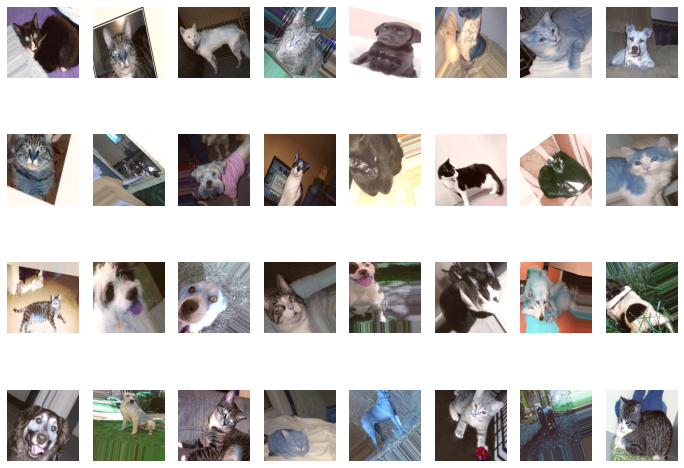

In [9]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img+127.0)/255.0)
    #plt.imshow((255*img/np.max(img)).astype(np.uint8))
    plt.axis('off')

In [10]:
EPOCHS = 1
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


320/320 [==============================] - 331s 1s/step - loss: 0.2075 - accuracy: 0.9112 - val_loss: 0.0525 - val_accuracy: 0.9785
INFO:tensorflow:Assets written to: filename.model/assets


{'loss': [0.111882284283638], 'accuracy': [0.9554426670074463], 'val_loss': [0.0524863563477993], 'val_accuracy': [0.978515625]}


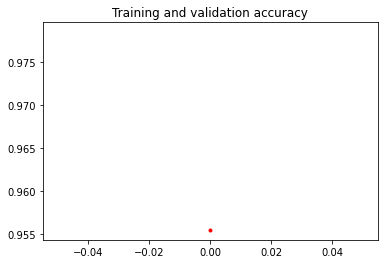

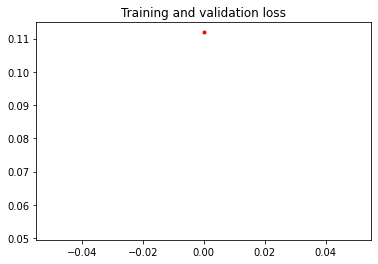

In [11]:
def plot_training(history):
  print(history.history)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("cat", "dog")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [15]:
model = load_model(MODEL_FILE)

10001.jpg  11546.jpg  1859.jpg	3417.jpg  4992.jpg  66.jpg    8339.jpg
10006.jpg  11547.jpg  1861.jpg	3418.jpg  5000.jpg  6700.jpg  8341.jpg
10007.jpg  1154.jpg   1864.jpg	3421.jpg  5004.jpg  6702.jpg  8342.jpg
10011.jpg  11550.jpg  1870.jpg	3424.jpg  5007.jpg  6704.jpg  8344.jpg
10016.jpg  11552.jpg  1878.jpg	3426.jpg  5008.jpg  6705.jpg  8347.jpg
10017.jpg  11553.jpg  187.jpg	3430.jpg  5009.jpg  6707.jpg  8348.jpg
10027.jpg  11557.jpg  1885.jpg	3433.jpg  500.jpg   6708.jpg  8349.jpg
10028.jpg  11558.jpg  1886.jpg	3434.jpg  5010.jpg  670.jpg   834.jpg
1002.jpg   1155.jpg   1887.jpg	3436.jpg  5018.jpg  6723.jpg  8358.jpg
10033.jpg  11560.jpg  1889.jpg	3446.jpg  5021.jpg  6724.jpg  8362.jpg
10037.jpg  11561.jpg  1890.jpg	3448.jpg  5027.jpg  6725.jpg  8364.jpg
10039.jpg  11564.jpg  1891.jpg	344.jpg   5029.jpg  6726.jpg  8369.jpg
10043.jpg  11569.jpg  1895.jpg	3453.jpg  5030.jpg  6734.jpg  8371.jpg
10044.jpg  1156.jpg   1901.jpg	3454.jpg  5033.jpg  6737.jpg  8376.jpg
10046.jpg  11575.jpg  

array([5.19996e-05, 9.99948e-01], dtype=float32)

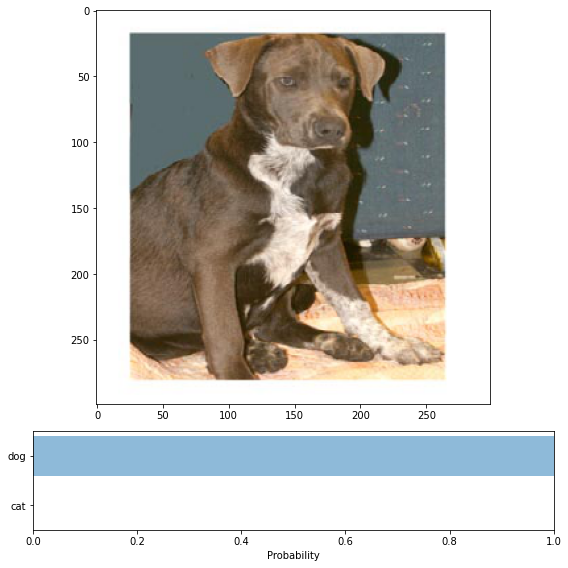

In [18]:
#!ls test/Dog
img = image.load_img('test/Dog/3277.jpg', target_size=(HEIGHT, WIDTH))#121
preds = predict(model, img)

plot_preds(np.asarray(img), preds)
preds

## On your own

Build a classifier to find all the images that have cars in it.
Note: you can use pretrain models available in keras

#### Finding vehicles
Choose between available pretrained models from the keras repository. Here is the list https://keras.rstudio.com/articles/applications.html.
Print out the names of the images so you can verify visually, and count how many are reported correctly.<br>
Hint: Use the 'glob' package to list all the images inside a folder
```import glob```
```glob.glob('folderpath/*.png')```

In [ ]:
import keras
import tensorflow as tf

from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_resnet_v2 import decode_predictions
from keras.applications.vgg16 import decode_predictions

import glob
# load the model
#modelincres = InceptionResNetV2()
modelvgg = VGG16()
for name in glob.glob('/content/gdrive/My Drive/exercises/data/testimg/*.jpg'):
    #image = load_img(name, target_size=(299, 299))
    image = load_img(name, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # predict the probability across all output classes
    yhat = modelvgg.predict(image)


    # convert the probabilities to class labels, it takes the max likely probability and it retrieves the label name
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    #print(label[1])
    if 'car' in label[1]:#counted 16 with VGG
        print('new image with a car found:%s (%.2f%%)' % (name,label[2]*100))
              

40960/35363 [==================================] - 0s 0us/step
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377398.jpg (31.04%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377438.jpg (96.22%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377504.jpg (57.69%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377509.jpg (93.02%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377515.jpg (84.49%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377523.jpg (12.89%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377539.jpg (24.83%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377575.jpg (19.33%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testimg/2377682.jpg (51.76%)
new image with a car found:/content/gdrive/My Drive/exercises/data/testim

## On your own 2.
Try to see if you can improve the performance of the classifier in exercise 1.